In [64]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f=open('WhatsApp Chat kelvi.txt','r',encoding='utf-8')

In [3]:
data=f.read()
# print(data)

In [4]:
pattern='\d{2}/\d{2}/\d{2},\s\d{1,2}:\d{2}\s[ap]m\s-\s'

In [5]:
messages=re.split(pattern,data)[1:]
# messages

In [6]:
dates=re.findall(pattern,data)
# dates

In [7]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%y, %I:%M\u202f%p - ')
# df['message_date']

In [8]:
df.shape

(8498, 2)

In [9]:
user=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        user.append(entry[1])
        messages.append(entry[2])
    else:
        user.append('Group notification')
        messages.append(entry[0])
        
df['user']=user
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
# df

In [10]:
df['year']=df['message_date'].dt.year
# df.head()

In [11]:
df['month']=df['message_date'].dt.month_name()

In [12]:
df['day']=df['message_date'].dt.day

In [13]:
df['hour']=df['message_date'].dt.hour

In [14]:
df['minute']=df['message_date'].dt.minute
# df

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

In [10]:
# f=open('WhatsApp Chat kelvi.txt','r',encoding='latin-1')

In [48]:
df.drop(columns=['user'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16372\1201771134.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  for index,val in df.iterrows():


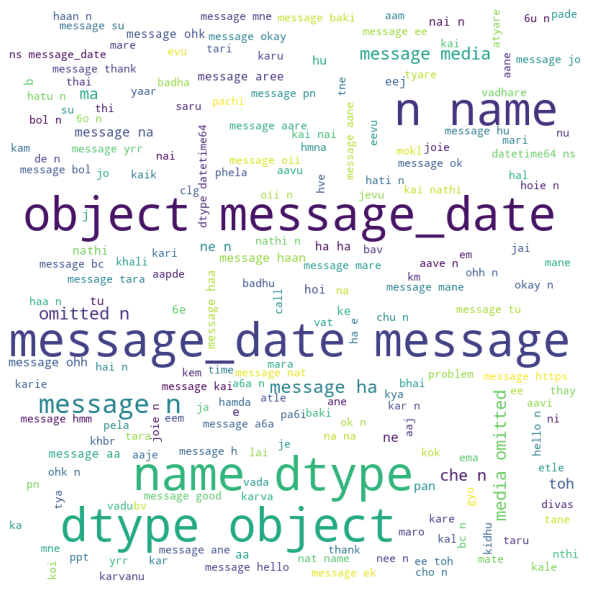

In [55]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for index,val in df.iterrows():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [46]:
df['month_num']=df['message_date'].dt.month
df['day_name'] = df['message_date'].dt.day_name()

In [23]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2021,4,April,19
1,2021,6,June,17
2,2021,7,July,14
3,2021,8,August,406
4,2021,9,September,26
5,2021,10,October,7
6,2021,11,November,4
7,2021,12,December,49
8,2022,1,January,561
9,2022,2,February,114


In [32]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))
    

In [35]:
timeline['time']=time
timeline

,year,month_num,month,message,time
0,2021,4,April,19,April-2021
1,2021,6,June,17,June-2021
2,2021,7,July,14,July-2021
3,2021,8,August,406,August-2021
4,2021,9,September,26,September-2021
5,2021,10,October,7,October-2021
6,2021,11,November,4,November-2021
7,2021,12,December,49,December-2021
8,2022,1,January,561,January-2022
9,2022,2,February,114,February-2022


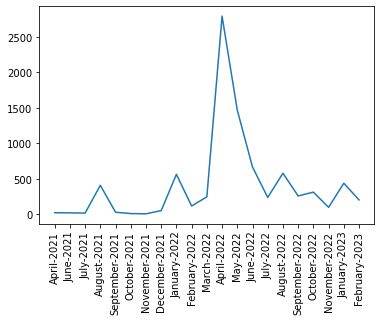

In [40]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))
        
df['period']=period        

In [67]:
user_heatmap = df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)
user_heatmap

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,3-4,4-5,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,113.0,167.0,65.0,25.0,59.0,56.0,73.0,21.0,35.0,9.0,...,50.0,44.0,48.0,21.0,254.0,0.0,1.0,0.0,5.0,15.0
Monday,38.0,84.0,14.0,52.0,69.0,37.0,28.0,0.0,69.0,1.0,...,22.0,118.0,84.0,63.0,0.0,0.0,0.0,0.0,7.0,44.0
Saturday,10.0,0.0,55.0,20.0,146.0,160.0,85.0,36.0,32.0,27.0,...,23.0,135.0,355.0,223.0,0.0,0.0,0.0,0.0,3.0,59.0
Sunday,89.0,80.0,4.0,19.0,37.0,244.0,151.0,53.0,5.0,14.0,...,19.0,50.0,78.0,138.0,356.0,230.0,0.0,0.0,0.0,9.0
Thursday,125.0,66.0,59.0,19.0,16.0,26.0,15.0,4.0,28.0,7.0,...,47.0,68.0,92.0,385.0,0.0,0.0,0.0,0.0,7.0,88.0
Tuesday,10.0,52.0,49.0,96.0,109.0,53.0,32.0,8.0,33.0,4.0,...,170.0,187.0,245.0,411.0,0.0,0.0,0.0,1.0,8.0,50.0
Wednesday,28.0,87.0,83.0,128.0,38.0,43.0,26.0,7.0,79.0,35.0,...,33.0,6.0,51.0,6.0,0.0,0.0,1.0,0.0,4.0,11.0


<Axes: xlabel='period', ylabel='day_name'>

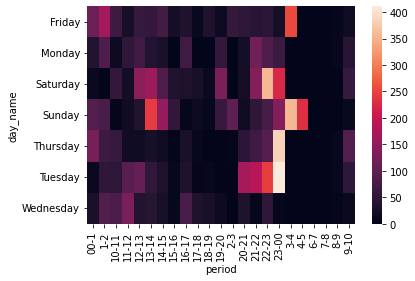

In [65]:
sns.heatmap(user_heatmap)